In [8]:
import os, shutil

original_dataset_dir = './train'

base_dir = './cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size = 20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size = 20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 191s 2s/step - loss: 0.6917 - acc: 0.5255 - val_loss: 0.6801 - val_acc: 0.5150
Epoch 2/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6593 - acc: 0.6115 - val_loss: 0.7560 - val_acc: 0.5090
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6165 - acc: 0.6670 - val_loss: 0.6163 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5704 - acc: 0.6980 - val_loss: 0.5969 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5358 - acc: 0.7295 - val_loss: 0.5962 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 9s 93ms/step - loss: 0.4981 - acc: 0.7560 - val_loss: 0.7010 - val_acc: 0.6380
Epoch 7/30
100/100 [==============================] - 9s 95ms/step - loss: 0.4734 - acc: 0.7690 - val_loss: 0.5902 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 9s 89ms/step - 

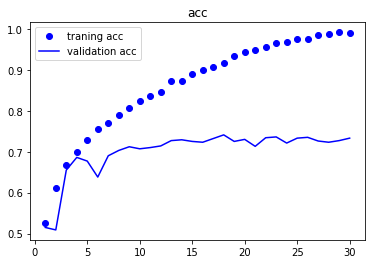

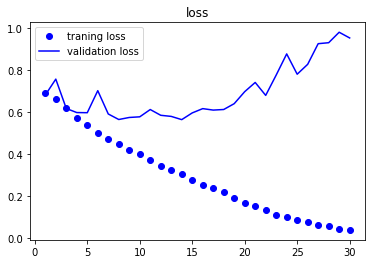

In [15]:
import matplotlib.pyplot as plt

history.history.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()

In [16]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

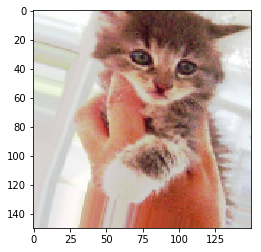

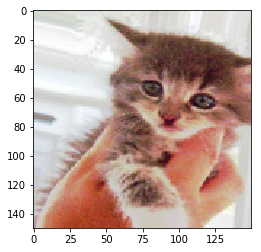

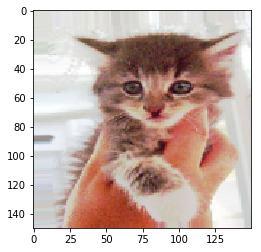

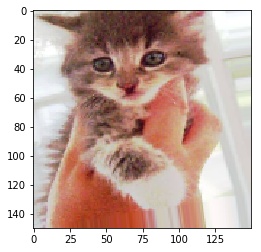

In [21]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i = 0
for batch in datagen.flow(x, batch_size =1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [30]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6921 - acc: 0.5162 - val_loss: 0.7027 - val_acc: 0.5013
Epoch 2/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6821 - acc: 0.5534 - val_loss: 0.6614 - val_acc: 0.5971
Epoch 3/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6705 - acc: 0.5900 - val_loss: 0.6544 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 30s 298ms/step - loss: 0.6554 - acc: 0.6081 - val_loss: 0.6400 - val_acc: 0.6206
Epoch 5/100
100/100 [==============================] - 30s 298ms/step - loss: 0.6459 - acc: 0.6184 - val_loss: 0.6517 - val_acc: 0.6174
Epoch 6/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6247 - acc: 0.6466 - val_loss: 0.5873 - val_acc: 0.6802
Epoch 7/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6077 - acc: 0.6706 -

100/100 [==============================] - 30s 300ms/step - loss: 0.4252 - acc: 0.8031 - val_loss: 0.4999 - val_acc: 0.7817
Epoch 61/100
100/100 [==============================] - 30s 296ms/step - loss: 0.4234 - acc: 0.8056 - val_loss: 0.4567 - val_acc: 0.7931
Epoch 62/100
100/100 [==============================] - 30s 302ms/step - loss: 0.4123 - acc: 0.8016 - val_loss: 0.4593 - val_acc: 0.8077
Epoch 63/100
100/100 [==============================] - 30s 300ms/step - loss: 0.4144 - acc: 0.8050 - val_loss: 0.4423 - val_acc: 0.7963
Epoch 64/100
100/100 [==============================] - 30s 300ms/step - loss: 0.4114 - acc: 0.8081 - val_loss: 0.4846 - val_acc: 0.7963
Epoch 65/100
100/100 [==============================] - 30s 299ms/step - loss: 0.4046 - acc: 0.8138 - val_loss: 0.4662 - val_acc: 0.8014
Epoch 66/100
100/100 [==============================] - 30s 297ms/step - loss: 0.4059 - acc: 0.8044 - val_loss: 0.4685 - val_acc: 0.7716
Epoch 67/100
100/100 [==============================] 

In [31]:
model.save('cats_and_dogs_small_2.h5')

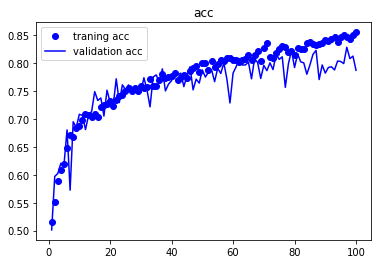

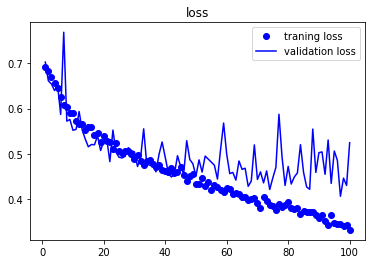

In [32]:


history.history.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.clf()

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()